In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

from palmerpenguins import load_penguins

In [22]:
penguins_data = load_penguins()
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [23]:
# ---- In real life, save your raw data before you clean data! ----

# Ensuring a hard copy of the data is made. Sometimes you will encounter errors with soft copying in Python. 
penguins_clean = penguins_data.copy()

# Drop rows with missing values
penguins_clean = penguins_clean.dropna()

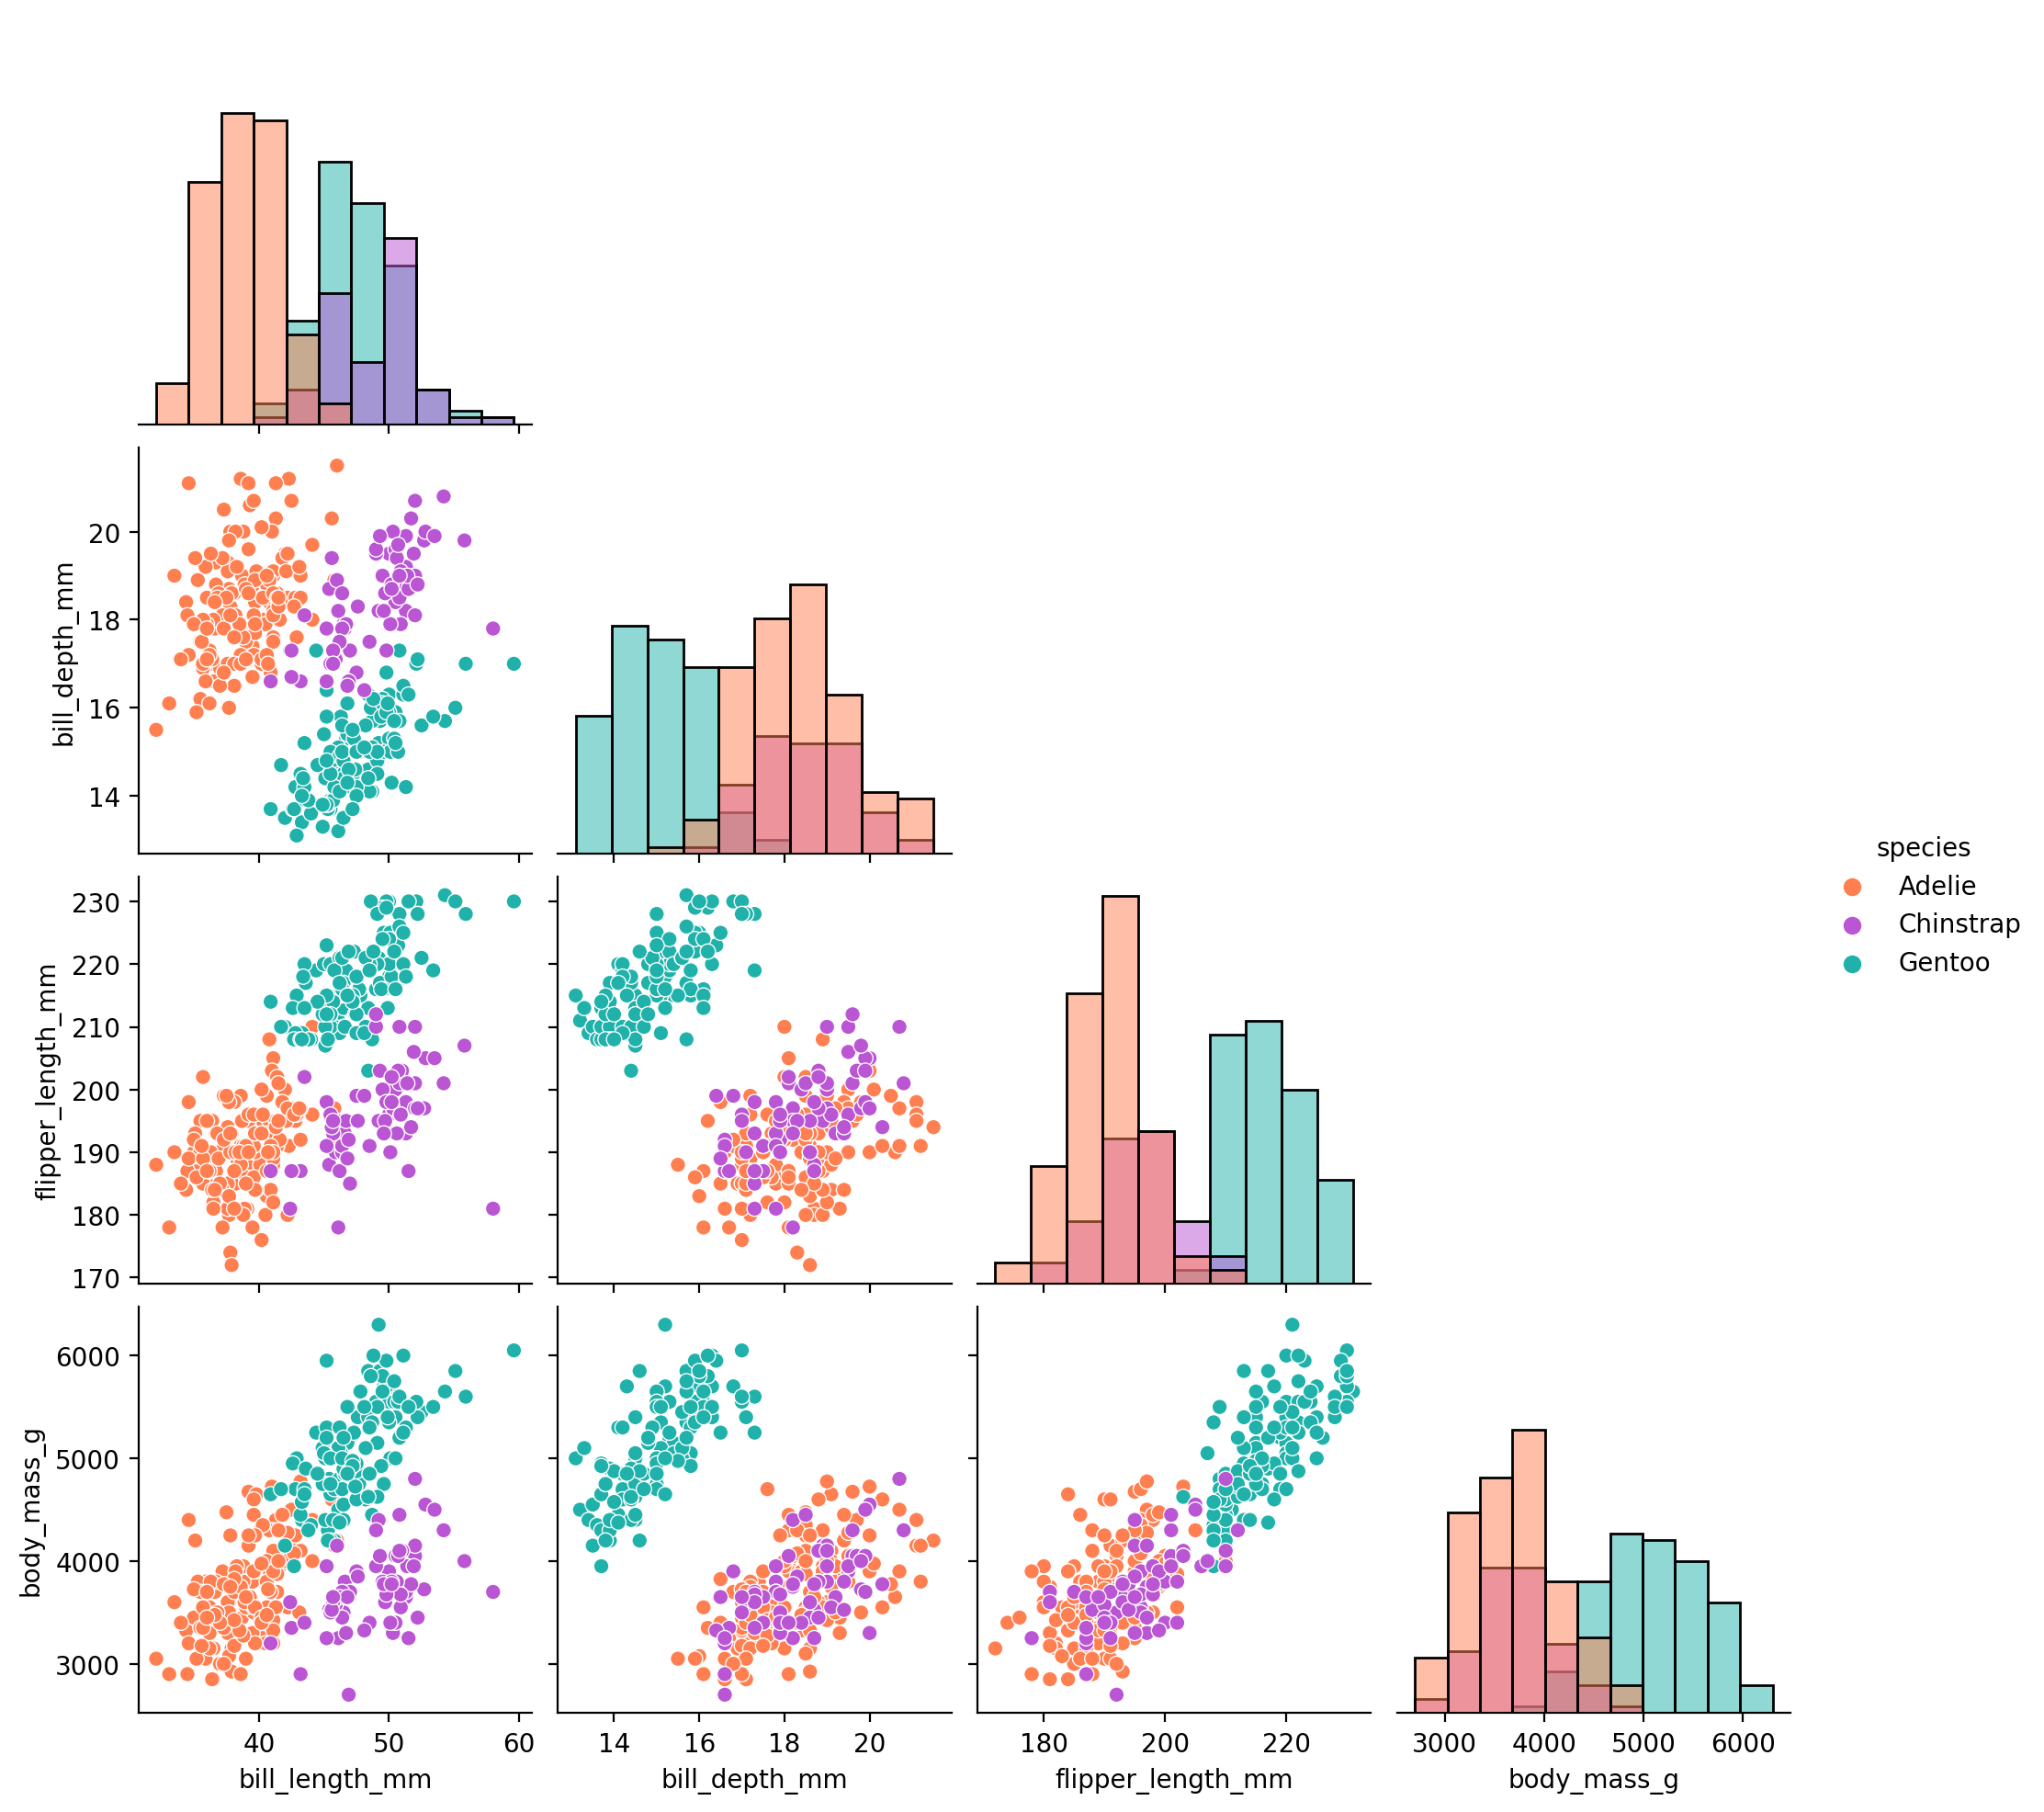

In [24]:
# The data in these columns are categorical. 
penguins_clean["species"] = penguins_clean["species"].astype("category")
penguins_clean["year"] = penguins_clean["year"].astype("category")


# I can make a dictionary to give the penguin species different colours.
colour_dict = {"Adelie"    :  "coral", 
               "Gentoo"    :  "lightseagreen", 
               "Chinstrap" :  "mediumorchid"}


# This plot will show us all the data plotted against each other. It will take a few seconds to generate. 
figure = sns.pairplot(penguins_clean, hue="species", diag_kind="hist", corner=True, palette=colour_dict)


In [25]:
# Standardising the data

# Make a copy of the clean data. 
penguins_scaled = penguins_clean.copy()

# Only want to scale the continuous variables
column_names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm","body_mass_g"]

scaler = StandardScaler()
penguins_scaled[column_names] = scaler.fit_transform(penguins_scaled[column_names])

penguins_scaled.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,male,2007
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,female,2007
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,female,2007
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,female,2007
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,male,2007


In [29]:
# Use n_components=4 to see explained variance for all columns: 
pca = PCA(n_components=4)
pca.fit(penguins_scaled[column_names])
print(pca.explained_variance_ratio_)

[0.68633893 0.19452929 0.09216063 0.02697115]


Text(0.5, 1.0, 'Principal Components')

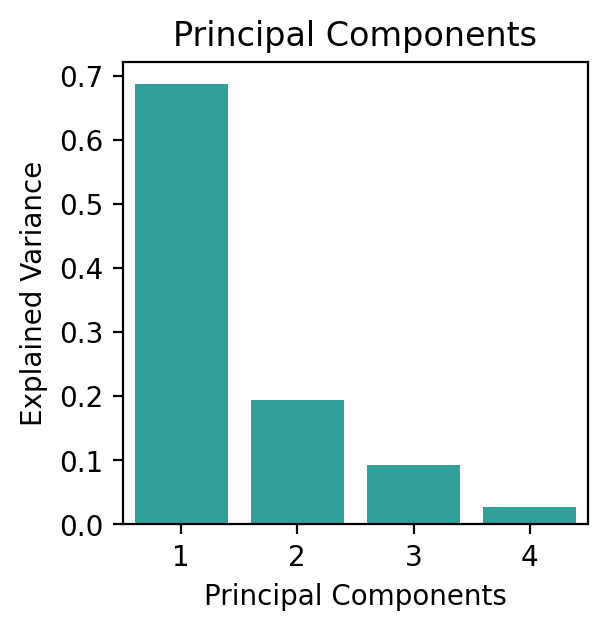

In [27]:
# Using seaborn to plot the explained variance
figure = plt.figure(figsize=(3,3))
ax = figure.add_subplot(1,1,1)
sns.barplot(x=[1,2,3,4], y=pca.explained_variance_ratio_, color="lightseagreen", ax=ax)

ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained Variance")
ax.set_title("Principal Components")

[Text(0, 0.5, 'PC01'),
 Text(0, 1.5, 'PC02'),
 Text(0, 2.5, 'PC03'),
 Text(0, 3.5, 'PC04')]

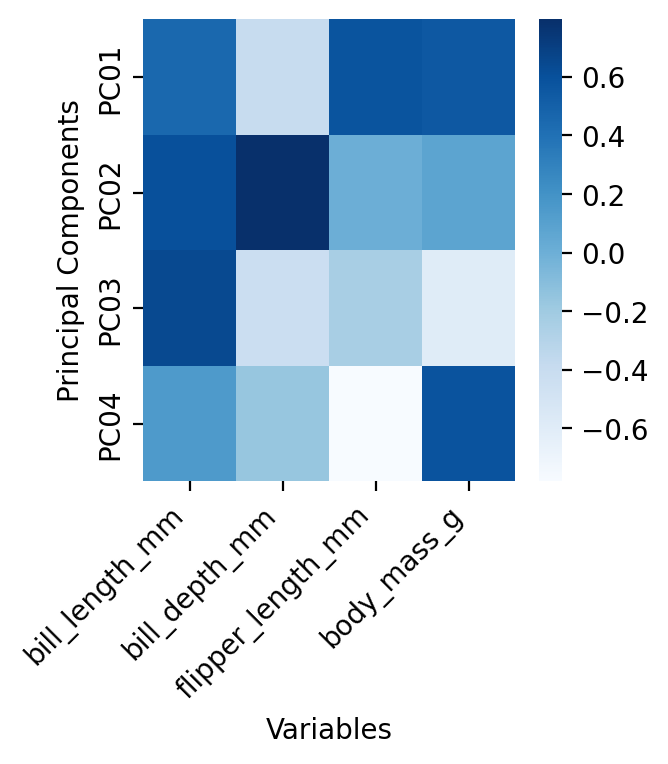

In [78]:
# Plotting which variables are most important for each principal component
figure = plt.figure(figsize=(3,3))
ax = figure.add_subplot(1,1,1)
sns.heatmap(pca.components_, cmap="Blues", ax=ax)

ax.set_xlabel("Variables")
ax.set_ylabel("Principal Components")
ax.set_xticklabels(column_names, rotation=45, ha="right")
ax.set_yticklabels(["PC01", "PC02", "PC03", "PC04"])

In [72]:
pca2 = PCA(n_components=4)
pca2.fit(penguins_scaled[column_names])
principalComponents = pca2.fit_transform(penguins_scaled[column_names])

# Define new dataframe with principal components

df_pca = pd.DataFrame(data = principalComponents, columns = ["PC01", "PC02", "PC03", "PC04"])

penguins_scaled.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

df_pca = pd.concat([df_pca, penguins_scaled[["species"]]], axis = 1)


<AxesSubplot: xlabel='PC03', ylabel='PC04'>

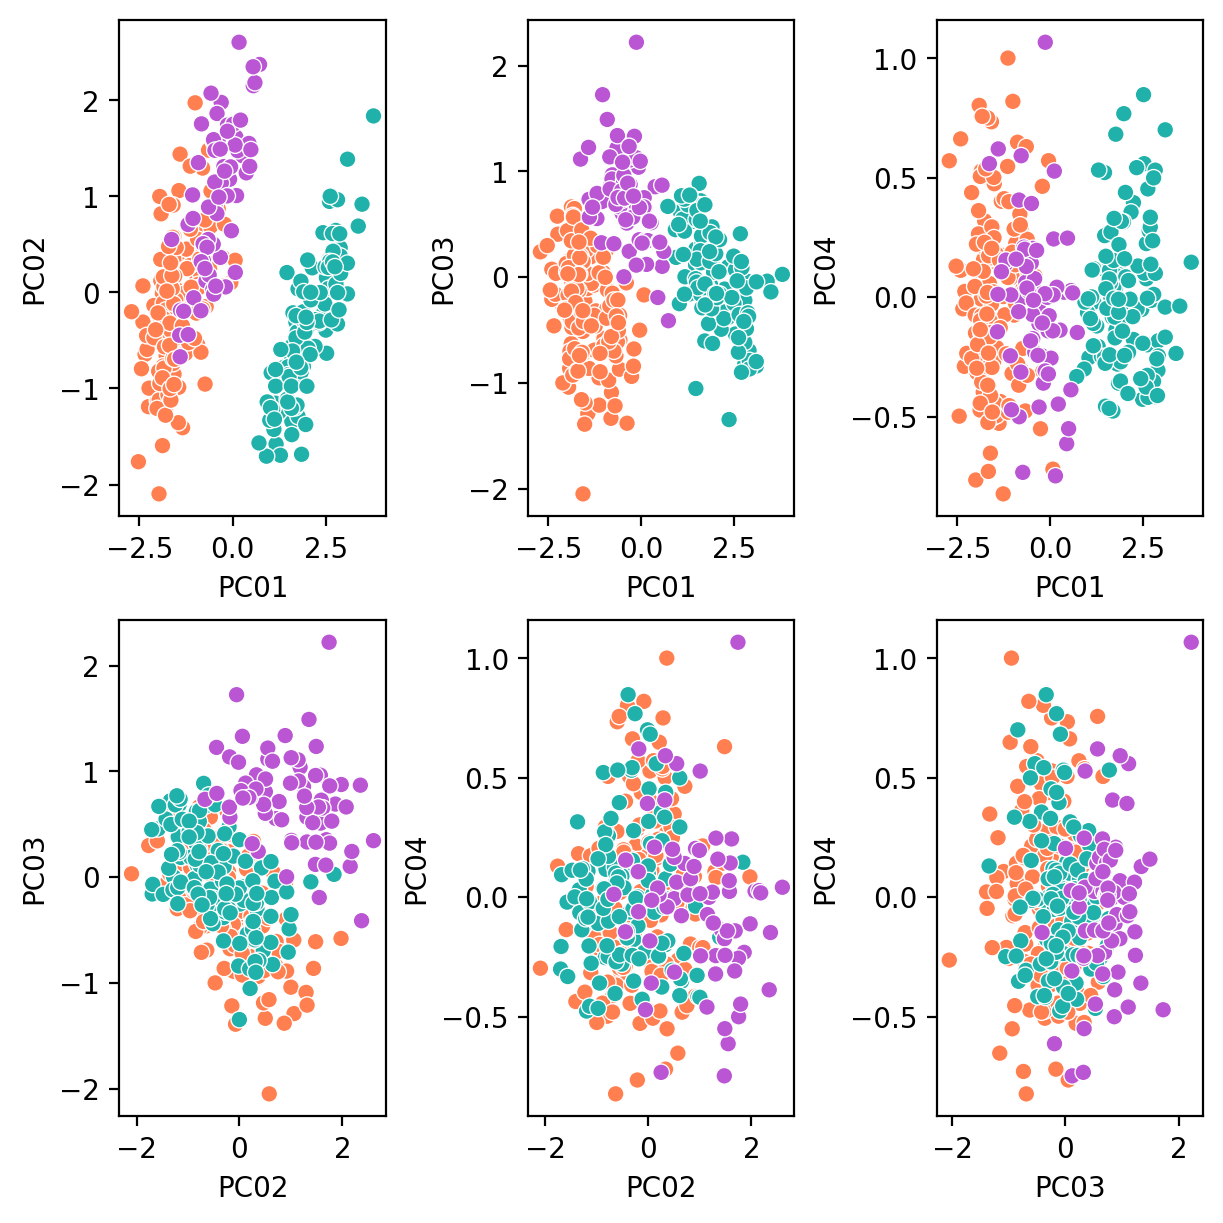

In [74]:
fig, ax = plt.subplots(2,3,figsize=(6,6), constrained_layout=True) 

# Using seaborn to plot the PCs against each other
sns.scatterplot(x="PC01", y="PC02", 
                hue="species", data=df_pca, palette=colour_dict, ax=ax[0,0], legend=False)

sns.scatterplot(x="PC01", y="PC03", 
                hue="species", data=df_pca, palette=colour_dict, ax=ax[0,1], legend=False)

sns.scatterplot(x="PC02", y="PC03", 
                hue="species", data=df_pca, palette=colour_dict, ax=ax[1,0], legend=False)

sns.scatterplot(x="PC01", y="PC04",
                hue="species", data=df_pca, palette=colour_dict, ax=ax[0,2], legend=False)

sns.scatterplot(x="PC02", y="PC04",
                hue="species", data=df_pca, palette=colour_dict, ax=ax[1,1], legend=False)      

sns.scatterplot(x="PC03", y="PC04",
                hue="species", data=df_pca, palette=colour_dict, ax=ax[1,2], legend=False)  